### 범위(Range)
* 최댓값 - 최솟값
* 이상치에 매우 민감

### 분산(Variance)
* Σ(x - 평균)² / n
* 각 데이터가 평균에서 얼마나 떨어져 있는지의 평균

### 표준편차(Standard Deviation)
* 표준편차 = √분산
* 작을수록 데이터가 평균 근처에 모여있음

### 사분위수(Quartiles)
* Q1: 25번째 백분위수
* Q2: 50번째 백분위수 (중앙값)
* Q3: 75번째 백분위수
* IQR(사분위수 범위): Q3 - Q1
* Q1 - 1.5 x IQR 혹은 Q3 + 1.5 x IQR 를 벗어나면 이상치

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib as mpl

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
# 1. 기본 산포도 계산
data1 = np.array([10, 10, 10, 10, 10])  # 산포도 = 0
data2 = np.array([5, 8, 10, 12, 15])    # 산포도 있음
data3 = np.array([1, 5, 10, 15, 19])    # 산포도 더 큼

# 인덱스를 1부터 시작하여 data1, data2, data3을 하나씩 선택
for i, data in enumerate([data1, data2, data3], 1):
    print(f"\n데이터 {i}: {data}")
    print(f"평균: {np.mean(data):.2f}")
    print(f"범위: {np.max(data) - np.min(data)}")
    print(f"분산: {np.var(data, ddof=1):.2f}")  # ddof=1: 표본분산
    print(f"표준편차: {np.std(data, ddof=1):.2f}")

'''
    편차의 합은 항상 0 -- 조건 1
    조건 1 때문에 편차 n개 에서 n-1개를 결정하면 나머지 1개의 편차가 결정된다
    모집단의 모수는 통계낼 수 없으므로, 표본 집단의 통계로 추정한다.
    모집단의 모수을 계산할 때는 n개를 알아야하고, 표본 집단의 통계치를 계산할 때 이미 평균을 알고 있다면 n-1로 계산한다
'''


데이터 1: [10 10 10 10 10]
평균: 10.00
범위: 0
분산: 0.00
표준편차: 0.00

데이터 2: [ 5  8 10 12 15]
평균: 10.00
범위: 10
분산: 14.50
표준편차: 3.81

데이터 3: [ 1  5 10 15 19]
평균: 10.00
범위: 18
분산: 53.00
표준편차: 7.28


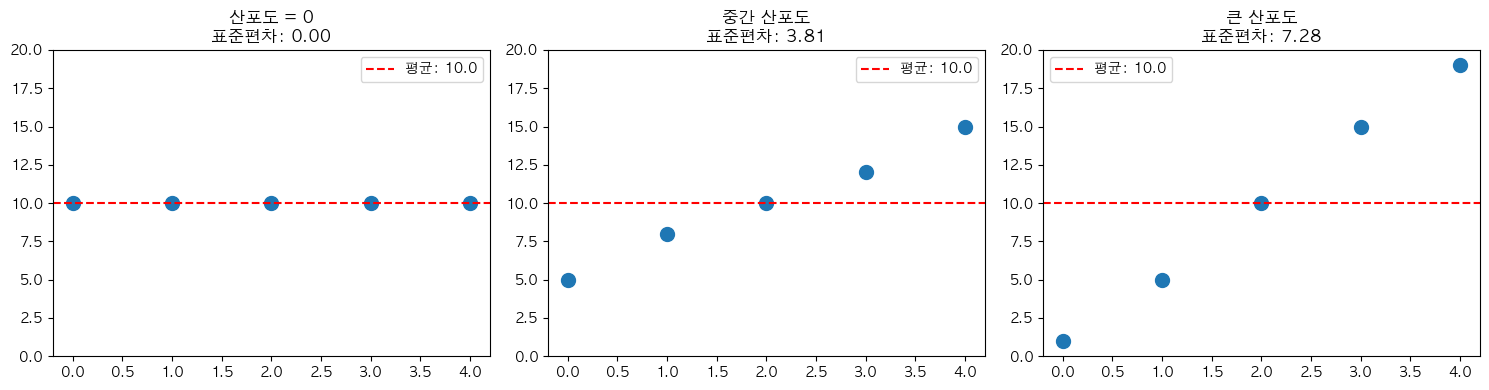

In [5]:
# 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
datasets = [data1, data2, data3]
titles = ['산포도 = 0', '중간 산포도', '큰 산포도']

for ax, data, title in zip(axes, datasets, titles):
    ax.scatter(range(len(data)), data, s=100)
    ax.axhline(np.mean(data), color='r', linestyle='--', label=f'평균: {np.mean(data):.1f}')
    ax.set_title(f'{title}\n표준편차: {np.std(data, ddof=1):.2f}')
    ax.set_ylim(0, 20)
    ax.legend()

plt.tight_layout()
plt.show()


시험 점수 분석:
Q1 (25%): 65.99
Q2 (중앙값): 73.10
Q3 (75%): 81.09
IQR: 15.10
이상치 하한: 43.33
이상치 상한: 103.74
이상치 개수: 1


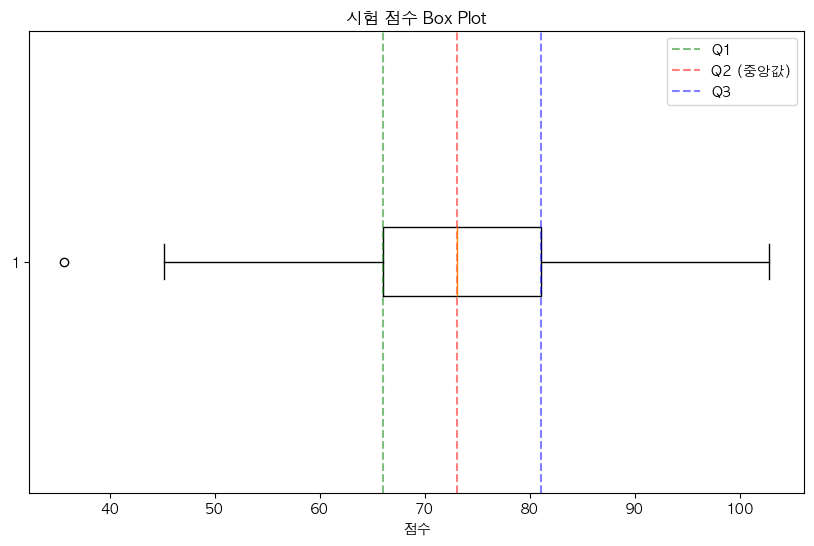

In [6]:
# 2. 사분위수와 Box Plot
np.random.seed(42)
exam_scores = np.random.normal(75, 15, 100)  # 평균 75, 표준편차 15

q1 = np.percentile(exam_scores, 25)
q2 = np.percentile(exam_scores, 50)
q3 = np.percentile(exam_scores, 75)
iqr = q3 - q1

print(f"\n시험 점수 분석:")
print(f"Q1 (25%): {q1:.2f}")
print(f"Q2 (중앙값): {q2:.2f}")
print(f"Q3 (75%): {q3:.2f}")
print(f"IQR: {iqr:.2f}")

# 이상치 경계
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"이상치 하한: {lower_bound:.2f}")
print(f"이상치 상한: {upper_bound:.2f}")

# 이상치 개수
outliers = exam_scores[(exam_scores < lower_bound) | (exam_scores > upper_bound)]
print(f"이상치 개수: {len(outliers)}")

# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(exam_scores, vert=False)
plt.xlabel('점수')
plt.title('시험 점수 Box Plot')
plt.axvline(q1, color='g', linestyle='--', alpha=0.5, label='Q1')
plt.axvline(q2, color='r', linestyle='--', alpha=0.5, label='Q2 (중앙값)')
plt.axvline(q3, color='b', linestyle='--', alpha=0.5, label='Q3')
plt.legend()
plt.show()


그룹별 통계:
              그룹A         그룹B         그룹C
count  100.000000  100.000000  100.000000
mean    68.961535   75.111523   81.297925
std      9.081684    4.768345   21.685658
min     43.802549   65.406144   15.174653
25%     63.990943   70.971697   66.891129
50%     68.730437   75.420536   81.953915
75%     74.059521   77.690852   94.088749
max     88.522782   88.600846  157.054630


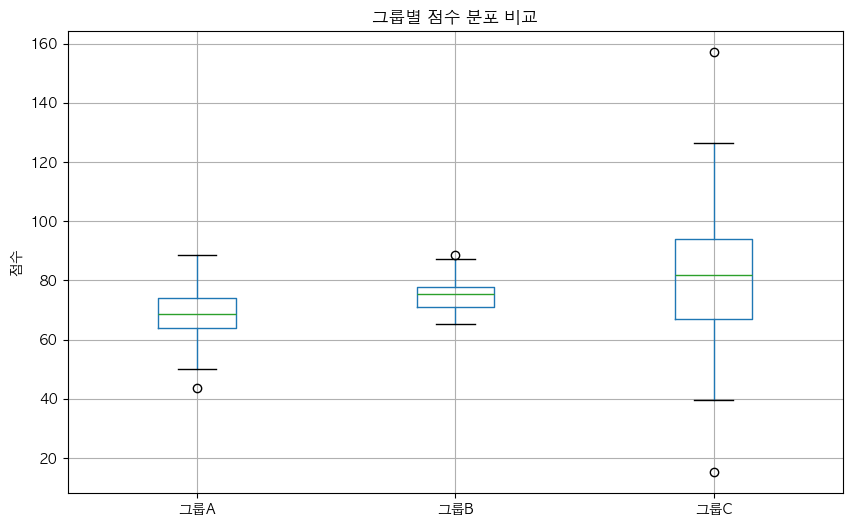

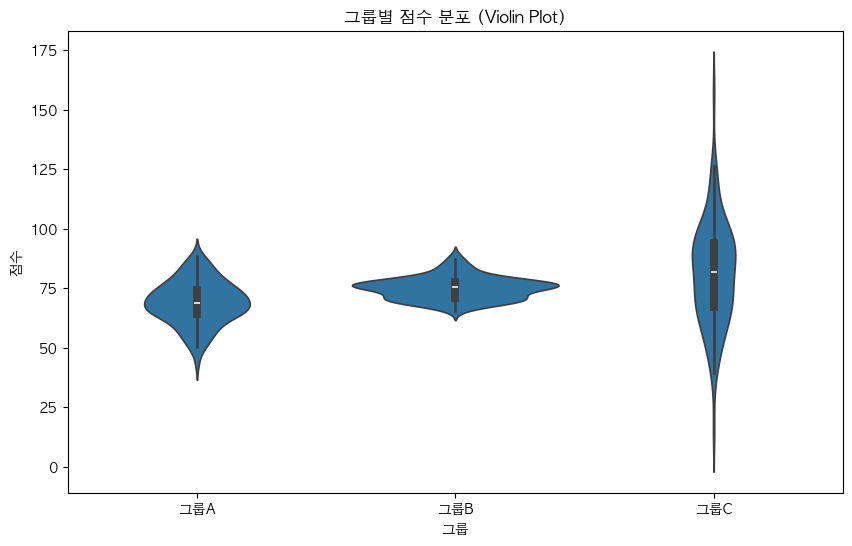

In [7]:
# 3. 여러 그룹 비교
np.random.seed(42)
df = pd.DataFrame({
    '그룹A': np.random.normal(70, 10, 100),
    '그룹B': np.random.normal(75, 5, 100),   # 평균은 비슷하지만 산포도 다름
    '그룹C': np.random.normal(80, 20, 100)
})

print("\n그룹별 통계:")
print(df.describe())

# 여러 Box Plot 비교
plt.figure(figsize=(10, 6))
df.boxplot()
plt.ylabel('점수')
plt.title('그룹별 점수 분포 비교')
plt.show()

# Violin Plot (분포 형태도 함께 보기)
plt.figure(figsize=(10, 6))
df_melted = df.melt(var_name='그룹', value_name='점수')
sns.violinplot(data=df_melted, x='그룹', y='점수')
plt.title('그룹별 점수 분포 (Violin Plot)')
plt.show()


정규분포에서의 표준편차 의미:
평균 ± 1표준편차 범위의 데이터 비율: 68.2%
평균 ± 2표준편차 범위의 데이터 비율: 95.3%
평균 ± 3표준편차 범위의 데이터 비율: 99.7%


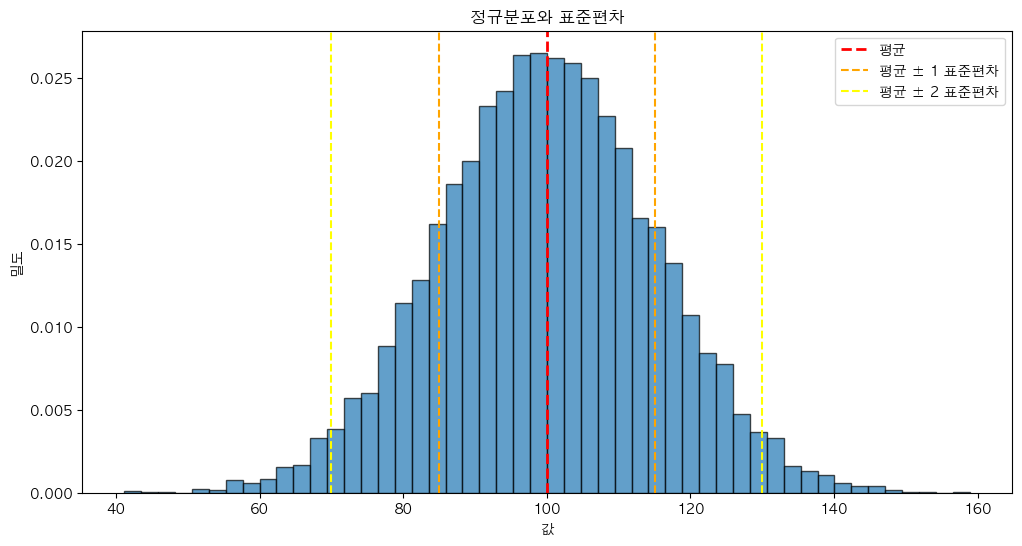

In [8]:
# 4. 표준편차의 의미 - 정규분포와 68-95-99.7 규칙
mean, std = 100, 15
data = np.random.normal(mean, std, 10000)

print(f"\n정규분포에서의 표준편차 의미:")
print(f"평균 ± 1표준편차 범위의 데이터 비율: {np.mean((data >= mean-std) & (data <= mean+std))*100:.1f}%")
print(f"평균 ± 2표준편차 범위의 데이터 비율: {np.mean((data >= mean-2*std) & (data <= mean+2*std))*100:.1f}%")
print(f"평균 ± 3표준편차 범위의 데이터 비율: {np.mean((data >= mean-3*std) & (data <= mean+3*std))*100:.1f}%")

plt.figure(figsize=(12, 6))
plt.hist(data, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axvline(mean, color='r', linestyle='--', linewidth=2, label='평균')
plt.axvline(mean-std, color='orange', linestyle='--', label='평균 ± 1 표준편차')
plt.axvline(mean+std, color='orange', linestyle='--')
plt.axvline(mean-2*std, color='yellow', linestyle='--', label='평균 ± 2 표준편차')
plt.axvline(mean+2*std, color='yellow', linestyle='--')
plt.xlabel('값')
plt.ylabel('밀도')
plt.title('정규분포와 표준편차')
plt.legend()
plt.show()